In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

from src.dataset import *
from src.lp import *

In [63]:
def plot_consumption(end=24*90, start=0):
    plt.plot(range(end-start), lp.P[start:end], label="real")
    plt.plot(np.sum(result.P[:, start:end], axis=0), label="LP")
    plt.plot([sum(lp.p_max)] * (end-start), label="p_max")
    plt.plot(result.buffered[start:end], label="buffer")
    plt.plot(result.P_delta, label="P_delta")
    plt.legend()

def plot_load(end=24*7, start=0):
    for n in range(result.load.shape[0]):
        data = result.load[n, start:end]
        plt.plot(range((end-start)), data, label="PEM" if n < PEM_amount else "AWE")
    plt.legend()

In [64]:
dataset = Dataset.load("../data/Timeseries_33.153_-100.213_E5_200000kWp_crystSi_14_33deg_-3deg_2013_2023.csv")

In [69]:
PEM_amount = 1
AWE_amount = 8
lp = LP(dataset.data_power[:90*24], PEM_amount, AWE_amount, 3000)
lp.solve()

Set parameter NumericFocus to value 3
Set parameter TimeLimit to value 180
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - ArcoLinux)

CPU model: AMD Ryzen 7 4700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30241 rows, 73441 columns and 131713 nonzeros
Model fingerprint: 0x9f6a8a46
Model has 43200 general constraints
Variable types: 54001 continuous, 19440 integer (19440 binary)
Coefficient statistics:
  Matrix range     [3e-01, 2e+07]
  Objective range  [6e-09, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+04, 1e+100]
  GenCon rhs range [2e-01, 4e-01]
  GenCon coe range [1e+00, 1e+00]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------

<gurobi.Model MIP instance Unnamed: 30241 constrs, 73441 vars, Parameter changes: TimeLimit=180.0, Username=(user-defined), NumericFocus=3>

obj: -5.105000758639705e-05, buffer_capacity: 0.0, P_delta: None


ValueError: x, y, and format string must not be None

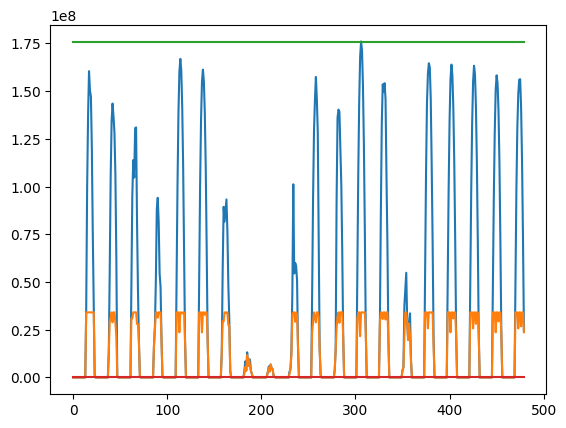

In [70]:
result = lp.get_result()
print(result)
plot_consumption(24*20)

In [ ]:
plt.plot(result.P_avg)

In [34]:
np.where(np.sum(result.P, axis=0) > lp.P)

(array([  23,   70,   87,   92,  119,  143,  167,  184,  209,  262,  279,
         311,  335,  351,  383,  407,  431,  455,  479,  503,  527,  551,
         566,  599,  623,  638,  671,  686,  719,  767,  791,  814,  815,
         839,  863,  878,  935,  959, 1007, 1022, 1189, 1198, 1214, 1223,
        1238, 1285, 1309, 1357, 1381, 1405, 1430, 1453, 1477, 1511, 1525,
        1573, 1598, 1602, 1603, 1607, 1621, 1631, 1645, 1651, 1656, 1669,
        1680, 1693, 1699, 1704, 1717, 1728, 1741, 1751, 1752, 1765, 1775,
        1776, 1789, 1800, 1813, 1824, 1837, 1848, 1861, 1885, 1896, 1909,
        1919, 1933, 1934, 1943, 1944, 1958, 1968, 1981, 1992, 2015, 2029,
        2040, 2053, 2064, 2087, 2125, 2135, 2136]),)